Dataset:
We will use a dataset of running statistics from smashrun.com and daily health data from withing.com.
This dataset includes the following files:
aggregates_calories_earned.csv: Active calories burned regrouped by days
aggregates_distance.csv: Travelled distance regrouped by days
weight.csv: Weights Measurements
· Weight: Weight (kg)
· Fat mass: Fat mass (kg)
· Bone mass: Bone mass (kg)
· Muscle mass: Muscle mass (kg)
· Hydration: Hydration (kg)
One thousand three hundred eighty-six smashrun tcx formatted files. TCX, or Training Center XML, is a file format used and popularized by Garmin to share activity data, usually from GPS smartwatches. It is typically used for sharing data about runs, hikes, cycling, and other outdoor activities.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
runningdata = pd.read_csv("/Users/mfanti/Documents/Master_Of_Data_Science_CU/Java_Parser/JavaRunningParser/data/running.csv")

In [25]:
runningdata = runningdata.astype({"Year":"int","DayOfYear":"int"})
sortedrunningdata = runningdata.sort_values(by=['Year', 'DayOfYear'])
sortedrunningdata

,Year,DayOfYear,WeekOfYear,DateTime,distanceMeters,totalTimeSeconds
408,2017,231,33,2017-08-19T19:35,3085,2474
275,2017,234,34,2017-08-22T09:24,4478,1856
1192,2017,251,36,2017-09-08T09:10,4112,1961
1060,2017,252,36,2017-09-09T17:02,4828,1980
951,2017,253,37,2017-09-10T11:07,3289,1901
...,...,...,...,...,...,...
673,2023,58,9,2023-02-27T12:52,5415,2315
47,2023,59,9,2023-02-28T08:54,6512,2440
309,2023,60,9,2023-03-01T15:52,6446,2805
807,2023,61,9,2023-03-02T08:41,8153,3024


In [26]:
runningdata1 = (sortedrunningdata
    .loc[sortedrunningdata['Year'] == 2022]
    .groupby(['DayOfYear'])
    .agg({'distanceMeters': 'sum', 'totalTimeSeconds': 'sum'})
)

#runningdata1 = (sortedrunningdata
#                .loc[sortedrunningdata['Year'] == 2019], :]).reset_index(drop=True)
from pathlib import Path
filepath = Path('/Users/mfanti/Documents/Master_Of_Data_Science_CU/FinalProject/FinalProject/data/running1.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
runningdata1.to_csv(filepath)
runningdata1

,distanceMeters,totalTimeSeconds
DayOfYear,,
1,4593,2183
2,8075,2878
3,6463,2278
4,8068,2928
5,7645,2892
...,...,...
361,9684,4457
362,5247,2274
363,4840,1929


In [27]:
runningdata2 = (sortedrunningdata
.drop_duplicates(subset=['Year', 'DayOfYear'], keep='last')
.loc[sortedrunningdata['Year'] == 2022]
)

from pathlib import Path
filepath = Path('/Users/mfanti/Documents/Master_Of_Data_Science_CU/FinalProject/FinalProject/data/running2.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
runningdata2.to_csv(filepath)
runningdata2

,Year,DayOfYear,WeekOfYear,DateTime,distanceMeters,totalTimeSeconds
447,2022,1,1,2022-01-01T17:26,4593,2183
238,2022,2,1,2022-01-02T09:34,8075,2878
738,2022,3,1,2022-01-03T09:08,6463,2278
976,2022,4,1,2022-01-04T16:59,8068,2928
844,2022,5,1,2022-01-05T17:20,7645,2892
...,...,...,...,...,...,...
461,2022,361,52,2022-12-27T14:25,9684,4457
1054,2022,362,52,2022-12-28T05:09,5247,2274
546,2022,363,52,2022-12-29T04:37,4840,1929
796,2022,364,52,2022-12-30T06:09,2728,1245


In [28]:
runningdata = runningdata1.merge(runningdata2, left_on=['DayOfYear'], right_on=['DayOfYear'], how='left')
runningdata = runningdata.drop(columns = ['distanceMeters_y', 'totalTimeSeconds_y'])
#runningdata1b = runningdata1.set_index('DayOfYear')
#.set_index('DayOfYear')
#runningdata = runningdata1.join(runningdata2, lsuffix='_caller', rsuffix='_other')
runningdata
#runningdata.plot()

,DayOfYear,distanceMeters_x,totalTimeSeconds_x,Year,WeekOfYear,DateTime
0,1,4593,2183,2022,1,2022-01-01T17:26
1,2,8075,2878,2022,1,2022-01-02T09:34
2,3,6463,2278,2022,1,2022-01-03T09:08
3,4,8068,2928,2022,1,2022-01-04T16:59
4,5,7645,2892,2022,1,2022-01-05T17:20
...,...,...,...,...,...,...
360,361,9684,4457,2022,52,2022-12-27T14:25
361,362,5247,2274,2022,52,2022-12-28T05:09
362,363,4840,1929,2022,52,2022-12-29T04:37
363,364,2728,1245,2022,52,2022-12-30T06:09


In [29]:
from pathlib import Path
filepath = Path('/Users/mfanti/Documents/Master_Of_Data_Science_CU/FinalProject/FinalProject/data/running.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
runningdata.to_csv(filepath)

Read the weight data from CSV files

<Axes: xlabel='DayOfYear'>

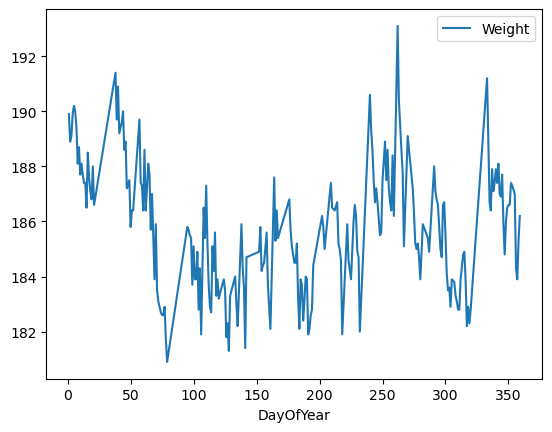

In [30]:
weightdata = pd.read_csv("/Users/mfanti/Documents/Master_Of_Data_Science_CU/Java_Parser/JavaRunningParser/data/weight.csv")
weightdata1 = (weightdata
.drop_duplicates(subset=['Year', 'DayOfYear'], keep='last')
 .loc[weightdata['Year'] == 2022]
 )

daysOfYear = np.arange(1, 366, 1)

weightdata1.plot('DayOfYear', 'Weight')

In [31]:
weightdata2 = runningdata.merge(weightdata1, left_on=['DayOfYear'], right_on=['DayOfYear'], how='left')
weightdata2 = weightdata2.drop(columns = ['Year_y', 'WeekOfYear_y', 'DateTime_y'])
#runningdata1b = runningdata1.set_index('DayOfYear')
#.set_index('DayOfYear')
#runningdata = runningdata1.join(runningdata2, lsuffix='_caller', rsuffix='_other')
#runningdata
weightdata2

,DayOfYear,distanceMeters_x,totalTimeSeconds_x,Year_x,WeekOfYear_x,DateTime_x,Weight
0,1,4593,2183,2022,1,2022-01-01T17:26,189.9
1,2,8075,2878,2022,1,2022-01-02T09:34,188.9
2,3,6463,2278,2022,1,2022-01-03T09:08,189.1
3,4,8068,2928,2022,1,2022-01-04T16:59,189.9
4,5,7645,2892,2022,1,2022-01-05T17:20,190.2
...,...,...,...,...,...,...,...
360,361,9684,4457,2022,52,2022-12-27T14:25,NaN
361,362,5247,2274,2022,52,2022-12-28T05:09,NaN
362,363,4840,1929,2022,52,2022-12-29T04:37,NaN
363,364,2728,1245,2022,52,2022-12-30T06:09,NaN


In [32]:
weightdata2.interpolate(method ='linear', limit_direction ='backward', inplace=True)
weightdata2.interpolate(method ='linear', limit_direction ='forward', inplace=True)
weightdata2

,DayOfYear,distanceMeters_x,totalTimeSeconds_x,Year_x,WeekOfYear_x,DateTime_x,Weight
0,1,4593,2183,2022,1,2022-01-01T17:26,189.9
1,2,8075,2878,2022,1,2022-01-02T09:34,188.9
2,3,6463,2278,2022,1,2022-01-03T09:08,189.1
3,4,8068,2928,2022,1,2022-01-04T16:59,189.9
4,5,7645,2892,2022,1,2022-01-05T17:20,190.2
...,...,...,...,...,...,...,...
360,361,9684,4457,2022,52,2022-12-27T14:25,186.2
361,362,5247,2274,2022,52,2022-12-28T05:09,186.2
362,363,4840,1929,2022,52,2022-12-29T04:37,186.2
363,364,2728,1245,2022,52,2022-12-30T06:09,186.2


<Axes: xlabel='DayOfYear'>

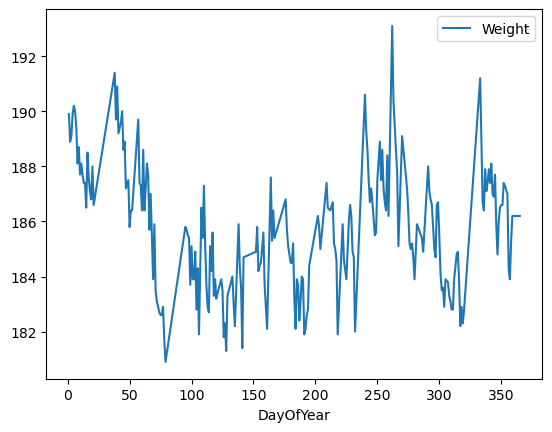

In [33]:
weightdata2.plot('DayOfYear', 'Weight')

In [ ]:
from pathlib import Path
filepath = Path('/Users/mfanti/Documents/Master_Of_Data_Science_CU/FinalProject/FinalProject/data/weightdata.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
weightdata2.to_csv(filepath)

Read the calories data from CSV files

<Axes: xlabel='DayOfYear'>

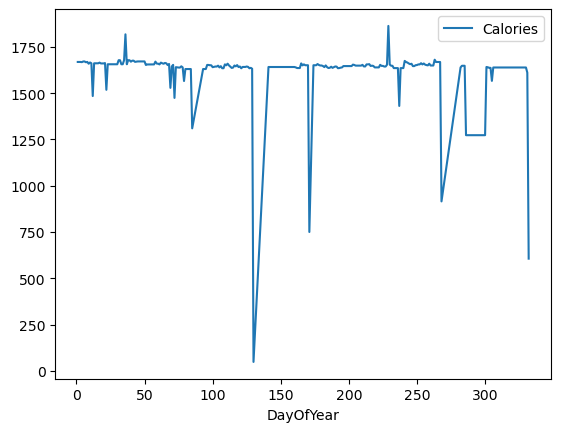

In [38]:
caloriesdata = pd.read_csv("/Users/mfanti/Documents/Master_Of_Data_Science_CU/Java_Parser/JavaRunningParser/data/aggregates_calories_passive.csv")
caloriesdata1 = (caloriesdata
.drop_duplicates(subset=['Year', 'DayOfYear'], keep='last')
.loc[caloriesdata['Year'] == 2022]
)

daysOfYear = np.arange(1, 366, 1)

caloriesdata1.plot('DayOfYear', 'Calories')

In [36]:
from pathlib import Path
filepath = Path('/Users/mfanti/Documents/Master_Of_Data_Science_CU/FinalProject/FinalProject/data/caloriesdata.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
caloriesdata1.to_csv(filepath)